In [1]:
import pandas as pd

In [2]:
trojmiasto = pd.read_csv("/content/trojmiasto")

In [ ]:
trojmiasto

In [4]:
#Zadanie 1.1
trojmiasto["created_at"] = [wiersz.replace("Mon", "Poniedziałek").replace("Tue", "Wtorek").replace("Wed", "Środa").replace("Thu", "Czwartek").replace("Fri", "Piątek").replace("Sat", "Sobota").replace("Sun", "Niedziela") for wiersz in trojmiasto["created_at"]]

In [5]:
#Zadanie 1.2
trojmiasto["user_created_at"] = [wiersz.replace("Jan", "01").replace("Feb", "02").replace("Mar", "03").replace("Apr", "04").replace("May", "05").replace("Jun", "06").replace("Jul", "07").replace("Aug", "08").replace("Sep", "09").replace("Oct", "10").replace("Nov", "11").replace("Dec", "12") for wiersz in trojmiasto["user_created_at"]]

In [ ]:
#Zadanie 1.3
[element for element in trojmiasto["tweet_url"]]

In [ ]:
#Zadanie 1.4
[element for element in trojmiasto["urls"]]

In [ ]:
#Zadanie 1.5
[element for element in trojmiasto["media"]]

In [ ]:
#Zadanie 1.6
trojmiasto["text_without_stopwords"] = ""
stopwords = ["ach","aj","albo","bardzo","bez","bo","być","ci","cię","ciebie","co","czy","daleko","dla","dlaczego","dlatego","do","dobrze","dokąd","dość","dużo","dwa","dwaj","dwie","dwoje","dziś","dzisiaj","gdyby","gdzie","go","ich","ile","im","inny","ja","ją","jak","jakby","jaki","je","jeden","jedna","jedno","jego","jej","jemu","jeśli","jest","jestem","jeżeli","już","każdy","kiedy","kierunku","kto","ku","lub","ma","mają","mam","mi","mną","mnie","moi","mój","moja","moje","może","mu","my","na","nam","nami","nas","nasi","nasz","nasza","nasze","natychmiast","nią","nic","nich","nie","niego","niej","niemu","nigdy","nim","nimi","niż","obok","od","około","on","ona","one","oni","ono","owszem","po","pod","ponieważ","przed","przedtem","są","sam","sama","się","skąd","tak","taki","tam","ten","to","tobą","tobie","tu","tutaj","twoi","twój","twoja","twoje","ty","wam","wami","was","wasi","wasz","wasza","wasze","we","więc","wszystko","wtedy","wy","żaden","zawsze","że","a","aby","acz","aczkolwiek","ale","ależ","aż","bardziej","bowiem","by","byli","bynajmniej","był","była","było","były","będzie","będą","cali","cała","cały","cokolwiek","coś","czasami","czasem","czemu","czyli","gdy","gdyż","gdziekolwiek","gdzieś","i","inna","inne","innych","iż","jakaś","jakichś","jakie","jakiś","jakiż","jakkolwiek","jako","jakoś","jednak","jednakże","jeszcze","kilka","kimś","ktokolwiek","ktoś","która","które","którego","której","który","których","którym","którzy","lat","lecz","mimo","między","mogą","moim","możliwe","można","musi","nad","naszego","naszych","natomiast","nawet","no","o","oraz","pan","pana","pani","podczas","pomimo","ponad","powinien","powinna","powinni","powinno","poza","prawie","przecież","przede","przez","przy","roku","również","sobie","sobą","sposób","swoje","ta","taka","takie","także","te","tego","tej","teraz","też","totobą","toteż","trzeba","twoim","twym","tych","tylko","tym","u","w","według","wiele","wielu","więcej","wszyscy","wszystkich","wszystkie","wszystkim","właśnie","z","za","zapewne","zeznowu","znów","został","żadna","żadne","żadnych","żeby"]
for i, row in trojmiasto.iterrows():
    tekst = row["text"].split(" ")
    czysty = [wyraz for wyraz in tekst if wyraz.lower() not in stopwords]
    oczyszczony_tekst = " ".join(czysty)
    trojmiasto.at[i, "text_without_stopwords"] = oczyszczony_tekst

In [ ]:
trojmiasto["text_without_stopwords"]

In [ ]:
#Zadanie 2.1
trojmiasto_posortowane = trojmiasto.sort_values("favorite_count", ascending=False).head(5)
print(trojmiasto_posortowane["text"])

In [ ]:
#Zadanie 2.2
trojmiasto_retweety = trojmiasto.sort_values("retweet_count", ascending=False).head(5)
print(trojmiasto_retweety["text"])

In [ ]:
#Zadanie 2.3
trojmiasto[trojmiasto["possibly_sensitive"] == False] ["text"]

In [ ]:
#Zadanie 2.4
oldest_user_date = trojmiasto["user_created_at"].min()
oldest_user = trojmiasto[trojmiasto["user_created_at"] == oldest_user_date]["user_name"].values[0]
trojmiasto_oldest = trojmiasto[trojmiasto["user_name"] == oldest_user]
print(trojmiasto_oldest["text"])

In [ ]:
#Zadanie 2.5
most_followers_user = trojmiasto["user_followers_count"].max()
most_followers = trojmiasto[trojmiasto["user_followers_count"] == most_followers_user]["user_name"].values[0]
trojmiasto_followers = trojmiasto[trojmiasto["user_name"] == most_followers]
print(trojmiasto_followers["text"])

In [ ]:
#Zadanie 2.6
trojmiasto[trojmiasto["user_verified"] == True] ["user_name"]

In [30]:
#Zadanie 2.7
trojmiasto["dzien_tygodnia"] = trojmiasto["created_at"].str.split().str[0]
dni_tygodnia = trojmiasto.groupby(["dzien_tygodnia"]).size().reset_index(name='counts')
dni_tygodnia = dni_tygodnia.sort_values(by='counts', ascending=False)
print("Najczęściej publikowano tweety w: ", dni_tygodnia.iloc[0]["dzien_tygodnia"])

Najczęściej publikowano tweety w:  Poniedziałek


In [7]:
!pip install spacy -U
!python -m spacy download pl_core_news_sm
#pl_core_news_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 48.2 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
      Successfully uninstalled spacy-3.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 3.5.0 which is incompatible.
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-21 21:43:59.808613: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simp

In [8]:
import spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [10]:
nlp = spacy.load("pl_core_news_sm")

In [16]:
#Zadanie 3.1
trojmiasto["persons"] = ""
for i, row in trojmiasto.iterrows():
    if isinstance(row["text"], str):
        text = row["text"]
        doc = nlp(text)
        persons = [ent.text for ent in doc.ents if ent.label_ == "persName"]
        if not persons:
            trojmiasto.at[i, "persons"] = ""
        else:
            trojmiasto.at[i, "persons"] = persons
    else:
        trojmiasto.at[i, "persons"] = ""

In [14]:
#Zadanie 3.2
trojmiasto["places"] = ""
for i, row in trojmiasto.iterrows():
    if isinstance(row["text"], str):
        text = row["text"]
        doc = nlp(text)
        places = [ent.text for ent in doc.ents if ent.label_ == "placeName"]
        if not persons:
            trojmiasto.at[i, "places"] = ""
        else:
            trojmiasto.at[i, "places"] = places
    else:
        trojmiasto.at[i, "places"] = ""

In [19]:
#Zadanie 3.3
trojmiasto["organizations"] = ""
for i, row in trojmiasto.iterrows():
    if isinstance(row["text"], str):
        text = row["text"]
        doc = nlp(text)
        organizations = [ent.text for ent in doc.ents if ent.label_ == "orgName"]
        if not persons:
            trojmiasto.at[i, "organizations"] = ""
        else:
            trojmiasto.at[i, "organizations"] = organizations
    else:
        trojmiasto.at[i, "organizations"] = ""

In [24]:
#Zadanie 4
import matplotlib.pyplot as plt

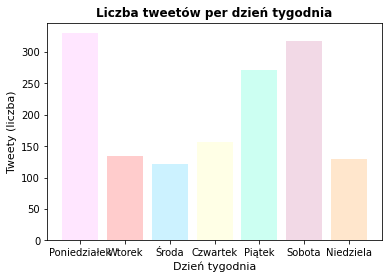

In [29]:
data = [elem for elem in trojmiasto["created_at"]]

poniedzialek = 0
wtorek = 0
sroda = 0
czwartek = 0
piatek = 0
sobota = 0
niedziela = 0

for elem in data:
    if elem.find("Poniedziałek") != -1:
        poniedzialek +=1
    elif elem.find("Wtorek") != -1:
        wtorek +=1
    elif elem.find("Środa") != -1:
        sroda +=1
    elif elem.find("Czwartek") != -1:
        czwartek +=1
    elif elem.find("Piątek") != -1:
        piatek +=1
    elif elem.find("Sobota") != -1:
        sobota +=1
    elif elem.find("Niedziela") != -1:
        niedziela +=1

x = ['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek', 'Sobota', 'Niedziela']
y = [poniedzialek, wtorek, sroda, czwartek, piatek, sobota, niedziela]

plt.bar(x, y)
plt.title('Liczba tweetów per dzień tygodnia', fontsize = 12, color = '#000000', fontweight = 'bold')
plt.xlabel('Dzień tygodnia', fontsize = 11, color = '#000000', fontweight = 'medium')
plt.ylabel('Tweety (liczba)', fontsize = 11, color = '#000000', fontweight = 'medium')
kolory = ['#ffe6ff', '#ffcccc', '#ccf2ff', '#ffffe6', '#ccfff2', '#f2d9e6', '#ffe6cc']
plt.bar(x, y, color = kolory)
plt.show()